# Second SDMS Assignment
## Deadine: 17/05/23
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/SecondAssignment.ipynb)

- Send your assignment to my email: guglielmo.padula@studenti.units.it before the 00:00 AM of the day after the deadiline.

## Exercise 1
Let $X_{t}$ a DTMC with stochastic matrix $A= \begin{bmatrix} 0 & 1 & 0 & 0 &0  \\  \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 & 0 \\ 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} & 0 \\ 0 & 0 & \frac{a}{a+b} & 0 & \frac{b}{a+b} \\ 0 & 0 & 0 & 1 & 0 \end{bmatrix}$ with $a=3, b=2$.
- Prove that it is irreducible
- Prove with probability simulation and with eigenvalues analysis that the DTMC has only a stationary distribution howewer that there is no convergence to that probability.
- Prove that there can't be trajectory convergence and simulate some trajectories

## Exercise 2

Let $Y_{t}$ a (birth death) CTMC with rate matrix $A= \begin{bmatrix} -b & b & 0 & 0 &0  \\  a & -{a-b} & {b} & 0 & 0 \\ 0 & a & -a-b & b & 0 \\ 0 & 0 & a & -a-b & b \\ 0 & 0 & 0 & a & -a \end{bmatrix}$ with $a=3, b=2$.

Remember that if $\lambda_{i}=q_{i,i+1}$ and $\mu_{i}=q_{i,i-1}$, $i=0,...,N-1$ then the stationary distribution $\pi$ has values
$\pi_1=\frac{1}{1+\sum_{k=1}^\infty\prod_{i=1}^{k}\frac{\lambda_{i-1}}{\mu_i}}$  and 
$\pi_k=\pi_0\prod_{i=1}^k\frac{\lambda_{i-1}}{\mu_i},\quad k=1,\ldots,N-1$

- Calculate the stationary distribution of the CTMC.
- Prove with probability simulation and with eigenvalues analysis that the CTMC converges to that stationary distribution.
- Simulate some trajectories 

## Exercise 3 (optional)
What is the relation between $Y_{t}$ and $X_{t}$?

# Solution
## Ex 1

In [1]:
import numpy as np
import pydtmc as mc
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1,0,0,0],
              [3/5,0,2/5,0,0],
              [0,3/5,0,2/5,0],
              [0,0,3/5,0,2/5],
              [0,0,0,1,0]])

In [3]:
X = mc.MarkovChain(A)

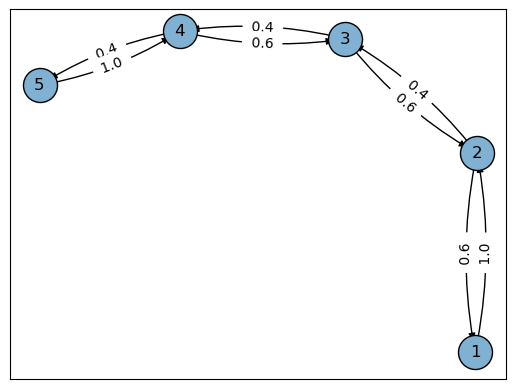

In [8]:
plt.ion()
mc.plot_graph(X)

Since the graph representing the chain is strongly connected, the chain is irreducible.

The eigenvalues and (left) eigenvectors may be computed with `scipy.linalg.eig()`.

In [83]:
eigval, eigvec = sp.linalg.eig(A,left=True,right = False)

In [84]:
print(eigval)

[-1.00000000e+00+0.j -6.92820323e-01+0.j -6.28952935e-17+0.j
  1.00000000e+00+0.j  6.92820323e-01+0.j]


We can see that as expected one eigenvalue is equal to one and that there is one eigenvalue equal to -1. Since we have an eigenvalue whose modulus is not strictly smaller than one, we do not expect convergence of the probability distribution to a limit distribution and instead we expect an oscillatory behaviour. In fact, we can check that for large $n$, even and odd powers of $A$ tend to different values.

In [89]:
print(f"Even powers converge to: \n\n{np.linalg.matrix_power(A,20)}\n")
print(f"Odd powers converge to: \n\n{np.linalg.matrix_power(A,21)}")


Even powers converge to: 

[[0.41563433 0.         0.46145522 0.         0.12291045]
 [0.         0.69250746 0.         0.30749254 0.        ]
 [0.4153097  0.         0.46156343 0.         0.12312687]
 [0.         0.69185821 0.         0.30814179 0.        ]
 [0.41482276 0.         0.46172575 0.         0.12345149]]

Odd powers converge to: 

[[0.         0.69250746 0.         0.30749254 0.        ]
 [0.41550448 0.         0.46149851 0.         0.12299702]
 [0.         0.69224776 0.         0.30775224 0.        ]
 [0.41511493 0.         0.46162836 0.         0.12325672]
 [0.         0.69185821 0.         0.30814179 0.        ]]


Nonetheless, the chain has an invariant distribution, which is the eigenvector of the eigenvalue 1. We can easily find such distribution as

In [90]:
pi = eigvec[:,3]
pi /= np.sum(pi) #normalising
print(pi)

[0.20769231 0.34615385 0.23076923 0.15384615 0.06153846]


With a simple simulation we can check that this distribution is in fact invariant

In [91]:
for n in range(25):
    pi = pi@A
print(pi)

[0.20769231 0.34615385 0.23076923 0.15384615 0.06153846]


Whereas if we start from an arbitrary distribution we do not obtain convergence, but instead the distribution oscillates between two possible values.

In [95]:
p = np.array([0,0.1,0.2,0.3,0.4])
for n in range(1,25):
    p = p@A
print(p)

p = np.array([0,0.1,0.2,0.3,0.4])
for n in range(1,26):
    p = p@A
print(p)

[0.24917554 0.27689661 0.27694149 0.12310339 0.07388298]
[0.16613797 0.41534043 0.18462068 0.18465957 0.04924136]


Since there is no convergence in probability, we can't have convergence in trajectories. In particular, from the analysis of the powers of the stochastic matrix, we conclude that each state is periodic of period 2, hence we do not have convergence towards a specific state.

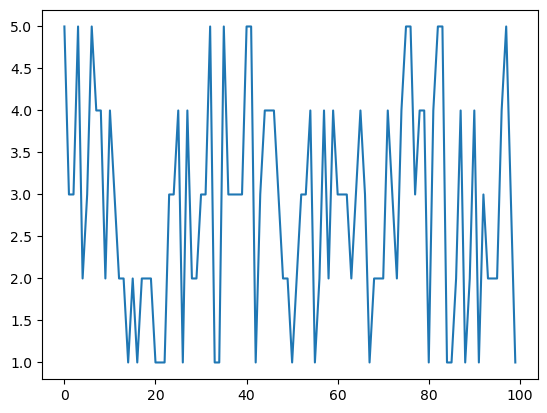

In [101]:
N = 100
p = np.array([0,0.1,0.2,0.3,0.4])
X = np.empty(N)
for n in range(N):
    X[n] = np.random.choice([1,2,3,4,5],1,p = p)
    p = p@A
plt.plot(range(N),X)

## Ex 2

In [2]:
A = np.array([[-2,2,0,0,0],
              [3,-5,2,0,0],
              [0,3,-5,2,0],
              [0,0,3,-5,2],
              [0,0,0,3,-3]])

In [87]:
print(A)

[[-2  2  0  0  0]
 [ 3 -5  2  0  0]
 [ 0  3 -5  2  0]
 [ 0  0  3 -5  2]
 [ 0  0  0  3 -3]]


In general, for a death-birth model with N states the invariant distribution is given by 
$$ \pi_n = \pi_0 \prod_{i=1}^{n} \frac{b(i-1)}{\delta(i)} \qquad \pi_0 = \frac{1}{1+\sum_{n=1}^N \prod_{i=1}^{n} \frac{b(i-1)}{\delta(i)}} $$
where $b(n)$ and $\delta(n)$ are the birth and death rates and the expression of $\pi_0$ comes from the normalisation.

For this particular chain we have $b(n) = b$ and $\delta(n) = a$, constant in $n$, so that 
$$ \prod_{i=1}^{n} \frac{b(i-1)}{\delta(i)} = \bigg(\frac{b}{a}\bigg)^n $$

We can then compute the invariant distribution as follows.

In [89]:
pi = np.zeros(5)
a = 3
b = 2

# computing (b/a)^n 
b_over_a = np.array([(b/a)**n for n in range(1,5)])

# computing pi
pi[0] = 1/(1+np.sum(b_over_a))
pi[1:] = pi[0] * b_over_a

print(f"Invariant distribution: {pi=:}")

Invariant distribution: pi=[0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


Alternatively, one could compute the eigenvalues and eigenvectors for $A^T$ and conclude that the invariant distribution is the eigenvector with null eigenvalue.

As a check for the above result I do so in the following lines.

In [175]:
eigvals, eigvecs = sp.linalg.eig(A.T)
print(f"Eigenvalues: {eigvals=:}")

Eigenvalues: eigvals=[-8.96335766e+00+0.j -6.51386792e+00+0.j -3.48613208e+00+0.j
 -3.01117442e-17+0.j -1.03664234e+00+0.j]


In [91]:
# from above we can see that the eigenvector with eigenvalue equal to zero is in position 3
pi = eigvecs[:,3]
pi /= np.sum(pi) # normalisation
print(f"Invariant distribution: {pi=:}")

Invariant distribution: pi=[0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


As expected, the invariant distribution obtained with this method is the same as the one explicitly computed above.

Moreover, from the analysis of the eigenvalues, given that all are negative, except for one which is equal to zero, we can state that the invariant distribution is also a limit distribution for the chain.

To prove that, let $v_i$ be the normalised eigenvectors of $A^T =: W$ and let $\lambda_i$ be the corresponding eigenvalues, with $\lambda_0 = 0$. We can write a generic vector as $p(t) = \sum_i \alpha_i(t) ~ v_i $, so that we get
$$ 
\begin{align*}
p(t) &= e^{Wt} p(0)\\
&= \sum_i e^{Wt} \alpha_i(0)~v_i\\
&= \sum_i \sum_k \alpha_i(0) \frac{t^k}{k!} W^k~v_i\\
&=  \sum_i \sum_k \alpha_i(0) \frac{t^k}{k!} \lambda_i^k~v_i\\
&=  \sum_i  \alpha_i(0) e^{\lambda_i~t} v_i\\
&= \alpha_0(0) v_0 +  \sum_{i\neq0}  \alpha_i(0) e^{\lambda_i~t} v_i
\end{align*} $$
Since $\forall ~~ i\neq 0  ~~ \lambda_i< 0$, as $t\to \infty$ all contributions from $v_i, ~i\neq 0$ vanish and thus the distribution $p$ tends to the invariant distribution $v_0$.


The convergence to the invariant distribution can be shown with simulation as follows.

In [99]:
def evolve_p(A,p,t):
    ps = []
    for i in t:
        p = p@sp.linalg.expm(A*i)
        ps.append(p)
    return np.array(ps)

In [134]:
p = np.random.uniform(0,1,size=5)
p = p/np.sum(p)
t = np.linspace(0,5,50) # since the convergence is exponential we do not need a large time interval
evolution = evolve_p(A,p,t)

### Showing coefficients 

In [195]:
eigvals, eigvecs = sp.linalg.eig(A.T)

In [196]:
basis = np.array([eigvecs[:,i] for i in range(eigvecs.shape[1])])
#for i in range(len(basis)):
#    basis[i] = basis[i]/np.sum(basis[i])

alpha = np.zeros((len(evolution),len(basis)))

for i in range(len(evolution)):
    for j in range(len(basis)):
        alpha[i,j] = np.dot(basis[j],evolution[i])

In [197]:
M = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        M[i,j] = basis[j]@basis[i]
M

array([[ 1.        ,  0.34860776,  0.07666075, -0.02823243, -0.04755545],
       [ 0.34860776,  1.        ,  0.37734509, -0.07596309, -0.10001638],
       [ 0.07666075,  0.37734509,  1.        , -0.16051021, -0.4094655 ],
       [-0.02823243, -0.07596309, -0.16051021,  1.        ,  0.47857724],
       [-0.04755545, -0.10001638, -0.4094655 ,  0.47857724,  1.        ]])

In [198]:
y = np.zeros(5)
for j in range(len(evolution)):
    for i in range(5):
        y[i] = evolution[j]@basis[i]
    alpha[j,:] = sp.linalg.solve(M,y)

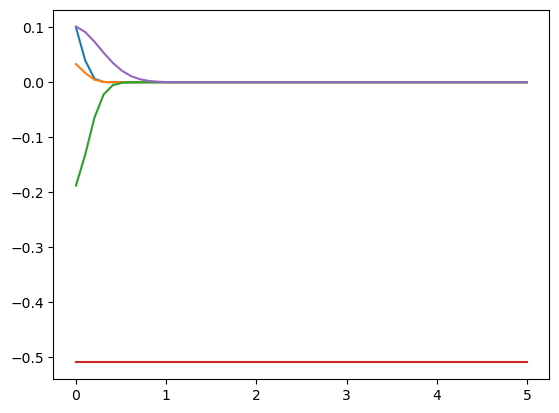

In [199]:
plt.plot(t,alpha)

Starting distribution: [0.22667682 0.20850051 0.3635245  0.14425384 0.05704433]
Limit distribution: [0.38388626 0.25592417 0.17061611 0.11374408 0.07582938]


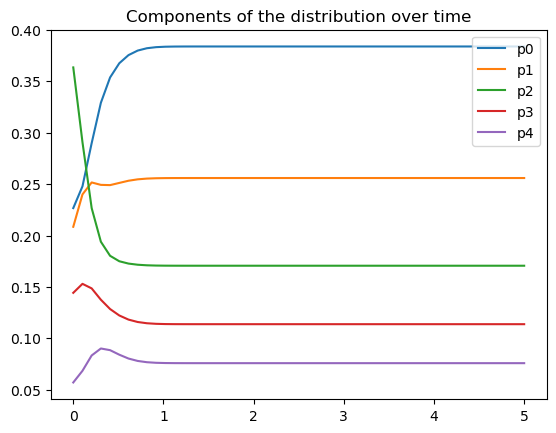

In [137]:
plt.plot(t,evolution)
plt.title("Components of the distribution over time")
plt.legend(["p0","p1","p2","p3","p4"])
print(f"Starting distribution: {p:}")
print(f"Limit distribution: {evolution[-1]:}")

To conclude, we can simulate some trajectories using the Gillespie algorithm.

In [72]:
def Gillespie(A,p,t0,t1):
    '''
    Simulate the evolution of a CTMC.

    :param A: is the matrix of rates
    :param p: is the initial probability (row vector)
    :param t0: is the initial time
    :param t1: is the final (maximum) time
    '''
    # list of all the possible states
    all_states = list(range(A.shape[0]))

    # initialisation of time and state 
    t = t0
    times = [t0]
    x = np.random.choice(all_states,p = p)
    states = [x]

    while t< t1:
        # the possible astates to the chain transitions
        possible_states = all_states.copy()
        del possible_states[int(x)]

        # total rate of transition to the possible states
        l = np.sum(A[x,:])-A[x,x]

        # simulation of time of transition
        u = np.random.uniform()
        tau = -np.log(1-u)/l

        # time update
        t += tau
        times.append(t)

        # transition probabilities
        pi = list(A[x,:]/l)
        del pi[int(x)]

        # state update
        x = np.random.choice(possible_states,p = pi)
        states.append(x)
    
    return times,states

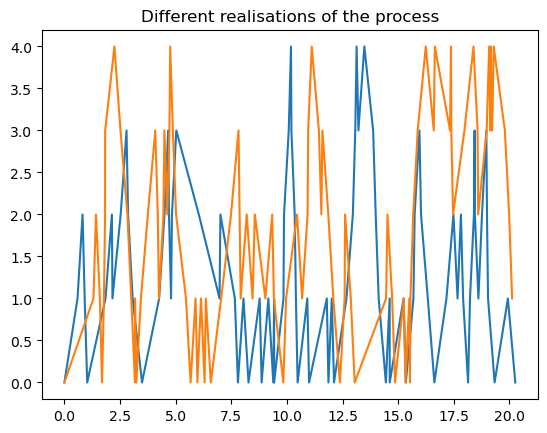

In [124]:
p = np.array([1,0,0,0,0])
t0 = 0
t1 = 20
times,states = Gillespie(A,p,t0,t1)
plt.plot(times,states)
times,states = Gillespie(A,p,t0,t1)
plt.plot(times,states)
_ =plt.title("Different realisations of the process")


## Ex 3
The chain $X_t$ represent the behaviour of the chain $Y_t$ at the times of transition. In fact, if $\lambda$ and $\mu$ are the transition rates for the ctmc, the probability of transition $i\to i+1$ is given by $\lambda/(\lambda+\mu)$ and the probability of transition $i\to i-1$ is given by  $\mu/(\lambda+\mu)$. At the times of transition we have zero probability of no transition happening, by definition.